# Business Understanding

1. Which movie genres receive the highest ratings?
2. Does spending more on production budget mean a movie makes more money?
3. What studios make the most money?

In [ ]:
#initial reactions: which studio to work with? which genre?? which months are best to release??

#adjust $$$ for inflation

#sql join movie basics and movie ratings table: use IMDB avg ratings to prove which GENRES have better RATINGS

#sql join """" to show RATINGS versus RUN TIME

#using bom_df: which STUDIOS make most MONEY (to study them further..?)

#use TN data to show PRODUCTION BUDGET versus gross $$ to show if spending a certain amount on production has higher pay off

# Data Understanding

Box Office Mojo
IMDB
Rotten Tomatoes
TheMovieDB
The Numbers


## Data Preparation

I begin by importing libraries, creating a dataframe for each set of data, and preview each dataframe.

#### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandasql
%matplotlib inline

#### Box Office Mojo

In [2]:
#Creating a dataframe for Box Office Money data
bom_df = pd.read_csv('data/bom.movie_gross.csv.gz')
bom_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [3]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### The Movie Database

In [4]:
#Creating a dataframe for The Movie Database data
tmdb_df = pd.read_csv('data/tmdb.movies.csv.gz')
tmdb_df.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [5]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### Rotten Tomatoes Info

In [6]:
#Creating a dataframe for Rotten Tomatoes Info data
rtinf_df = pd.read_csv('data/rt.movie_info.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
rtinf_df.head(2) 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [7]:
rtinf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [8]:
rtinf_df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

#### Rotten Tomatoes Reviews

In [9]:
#Creating a dataframe for Rotten Tomatoes Reviews data
rtrev_df = pd.read_csv('data/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
rtrev_df.head(2) 

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [10]:
rtrev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [11]:
rtrev_df.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

#### The Numbers

In [12]:
#Creating a dataframe for The Numbers data
tn_df = pd.read_csv('data/tn.movie_budgets.csv.gz')
tn_df.head(2) 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [13]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### IMDB Ratings

In [14]:
#create the connection to the SQL database
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()

In [15]:
#create dataframe for movie ratings table from imdb database
imdb_ratings_df = pd.read_sql("""
    SELECT *
    FROM movie_ratings;
""", conn)
imdb_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [16]:
imdb_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### IMDB Basics

In [64]:
#create dataframe for movie basics table from imdb database
imdb_basics_df = pd.read_sql("""
    SELECT *
    FROM movie_basics;
""", conn)
imdb_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [65]:
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [66]:
imdb_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

## 1. Which movie genres have the highest ratings?

I'm choosing to use imdb_ratings_df and imdb_basics to answer this question as the genres and average rating are listed.

In [67]:
#reminder what imdb_ratings_df data looks like
imdb_ratings_df.head(2) 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [68]:
#reminder what imdb_basics_df data looks like
imdb_basics_df.head(2) 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [69]:
#Making a new dataframe of ordered values (by movie_id) for imdb ratings
imdb_ratings_ord_df = imdb_ratings_df.sort_values(by = ['movie_id'])
imdb_ratings_ord_df.reset_index(drop=True, inplace = True)
imdb_ratings_ord_df 

,movie_id,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


In [70]:
#Making a new dataframe of ordered values (by movie_id) for imdb basics 
imdb_basics_ord_df = imdb_basics_df.sort_values(by = ['movie_id'])
imdb_basics_ord_df.reset_index(drop=True, inplace = True)
imdb_basics_ord_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [101]:
#Merging the ordered dataframes
imdb_comb_df = pd.merge(imdb_ratings_ord_df,
                      imdb_basics_ord_df[['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes',
                                 'genres']], on = 'movie_id')
imdb_comb_df 

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,6.1,13,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,6.5,119,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...,...
73851,tt9913084,6.2,6,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary
73852,tt9914286,8.7,136,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family"
73853,tt9914642,8.5,8,Albatross,Albatross,2017,NaN,Documentary
73854,tt9914942,6.6,5,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None


In [72]:
#taking a look at the different genres
imdb_comb_df['genres'].value_counts() 

Drama                         11612
Documentary                   10313
Comedy                         5613
Horror                         2692
Comedy,Drama                   2617
                              ...  
Comedy,Documentary,Fantasy        1
Drama,Music,News                  1
Animation,Fantasy,History         1
Animation,Family,Mystery          1
Family,Fantasy,Mystery            1
Name: genres, Length: 923, dtype: int64

In [73]:
imdb_comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [73]:
imdb_comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [74]:
imdb_comb_df= imdb_comb_df.dropna(subset=['genres'])

In [75]:
imdb_comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   averagerating    73052 non-null  float64
 2   numvotes         73052 non-null  int64  
 3   primary_title    73052 non-null  object 
 4   original_title   73052 non-null  object 
 5   start_year       73052 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [76]:
#making a new dataframe to look at average rating of each genre 
imdb1 = imdb_comb_df.groupby(['genres', 'averagerating']).sum().reset_index().groupby('genres').mean()
imdb1 

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
Action,5.500000,4165.278481,24961.670886,941.873418
"Action,Adult,Comedy",4.650000,18.000000,2014.000000,35.500000
"Action,Adventure",5.220930,2535.139535,3185.255814,151.906977
"Action,Adventure,Animation",6.027273,81148.704545,7646.613636,333.886364
"Action,Adventure,Biography",6.988235,58805.941176,2489.176471,111.705882
...,...,...,...,...
Thriller,5.233784,5953.567568,42335.972973,1651.432432
"Thriller,War",5.650000,1791.500000,2013.250000,88.750000
"Thriller,Western",7.150000,3322.000000,2013.250000,47.500000


In [77]:
#Making a new dataframe by sorting by average rating
imdb1_av_rt = imdb1.sort_values(by = ['averagerating'], ascending = False)
imdb1_av_rt 

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
"Comedy,Documentary,Fantasy",9.4,5.0,2015.0,70.0
"Documentary,Family,Musical",9.3,19.0,2017.0,59.0
"History,Sport",9.2,5.0,2016.0,0.0
"Music,Mystery",9.0,5.0,2012.0,0.0
Game-Show,9.0,7.0,2013.0,130.0
...,...,...,...,...
"Crime,Music",2.4,88.0,2018.0,94.0
"Adventure,Crime,Romance",2.3,9.0,2011.0,86.0
"History,Sci-Fi,Thriller",2.3,227.0,2017.0,120.0


In [78]:
imdb1_av_rt.reset_index(inplace=True) #resetting the index

In [79]:
imdb1_av_rt.head(15)

,genres,averagerating,numvotes,start_year,runtime_minutes
0,"Comedy,Documentary,Fantasy",9.4,5.0,2015.0,70.0
1,"Documentary,Family,Musical",9.3,19.0,2017.0,59.0
2,"History,Sport",9.2,5.0,2016.0,0.0
3,"Music,Mystery",9.0,5.0,2012.0,0.0
4,Game-Show,9.0,7.0,2013.0,130.0
5,"Documentary,News,Sport",8.8,25.0,2017.0,85.0
6,"Documentary,News,Reality-TV",8.8,8.0,2014.0,61.0
7,"Drama,Fantasy,War",8.8,22.0,2016.0,0.0
8,"Drama,Short",8.8,8.0,2018.0,18.0
9,"Comedy,Drama,Reality-TV",8.8,15.0,2016.0,0.0


In [80]:
#cleaning up the df for plotting
del imdb1_av_rt['start_year']
del imdb1_av_rt['numvotes']
del imdb1_av_rt['runtime_minutes']

In [81]:
#selecting the top 15
imdb1_av_rt = imdb1_av_rt.head(10)

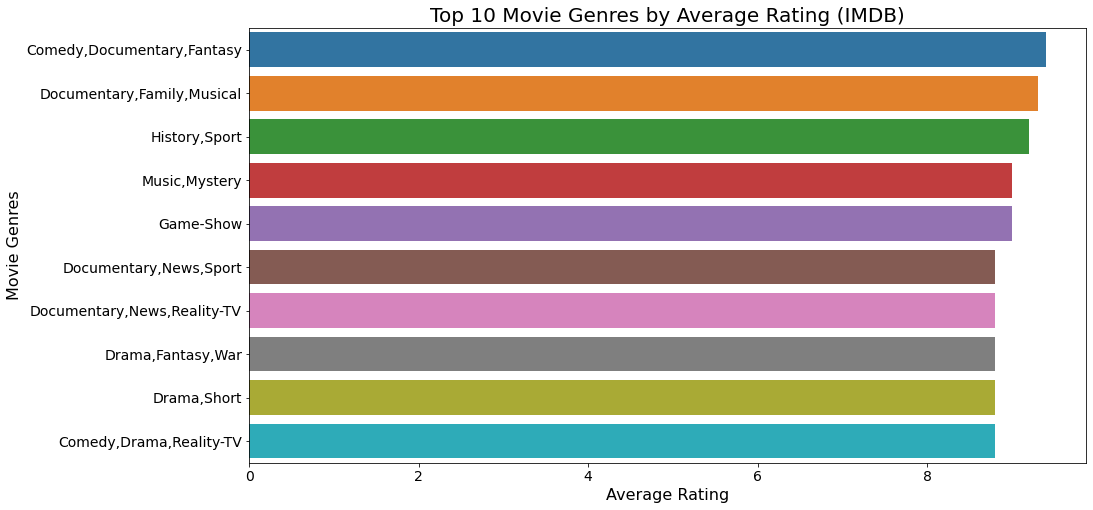

In [82]:
#plotting a bar plot
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'averagerating', y = 'genres', data = imdb1_av_rt)
plt.xlabel('Average Rating', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Movie Genres', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Top 10 Movie Genres by Average Rating (IMDB)', fontsize = 20)
plt.show();

#### What movie genres receive the most votes?

In [83]:
#New dataframe with the average rating of each genre and number of votes
imdb2 = imdb_comb_df.groupby(['genres', 'numvotes']).sum().reset_index().groupby('genres').mean()
imdb2 

,numvotes,averagerating,start_year,runtime_minutes
genres,,,,
Action,910.437126,16.876647,5904.107784,222.778443
"Action,Adult,Comedy",18.000000,4.650000,2014.000000,35.500000
"Action,Adventure",1676.446154,5.464615,2107.169231,100.492308
"Action,Adventure,Animation",24115.945946,7.405405,2273.317568,99.263514
"Action,Adventure,Biography",49984.600000,7.415000,2115.800000,94.950000
...,...,...,...,...
Thriller,801.040948,19.116595,6751.857759,263.375000
"Thriller,War",1791.500000,5.650000,2013.250000,88.750000
"Thriller,Western",3322.000000,7.150000,2013.250000,47.500000


In [84]:
#sorting by number of votes 
imdb2_vote= imdb2.sort_values(by = ['numvotes'], ascending = False)
imdb2_vote 

,numvotes,averagerating,start_year,runtime_minutes
genres,,,,
"Action,Adventure,Sci-Fi",195108.474576,6.087288,2168.211864,113.169492
"Adventure,Mystery,Sci-Fi",135042.500000,5.075000,2013.500000,105.500000
"Action,Fantasy,War",131509.000000,6.400000,2016.000000,51.000000
"Adventure,Drama,Sci-Fi",104543.894737,6.494737,2120.842105,109.789474
"Action,Adventure,Fantasy",96588.500000,5.533000,2074.970000,108.320000
...,...,...,...,...
"Music,Mystery",5.000000,9.000000,2012.000000,0.000000
"Comedy,Documentary,Fantasy",5.000000,9.400000,2015.000000,70.000000
"Horror,Musical,Romance",5.000000,5.200000,2013.000000,0.000000


In [85]:
imdb2_vote.reset_index(inplace=True) #resetting index

In [86]:
#cleaning up for plotting
del imdb2_vote['start_year']
del imdb2_vote['averagerating']
del imdb2_vote['runtime_minutes']

imdb2_vote.head(15)

,genres,numvotes
0,"Action,Adventure,Sci-Fi",195108.474576
1,"Adventure,Mystery,Sci-Fi",135042.500000
2,"Action,Fantasy,War",131509.000000
3,"Adventure,Drama,Sci-Fi",104543.894737
4,"Action,Adventure,Fantasy",96588.500000
5,"Biography,Drama,Thriller",84506.909091
6,"Action,Adventure,Thriller",83279.511111
7,"Action,Crime,Sci-Fi",78214.125000
8,"Action,Adventure,Mystery",66149.272727
9,"Adventure,Drama,Fantasy",61488.175000


In [87]:
#selecting the top 10
imdb2_vote = imdb2_vote.head(10)

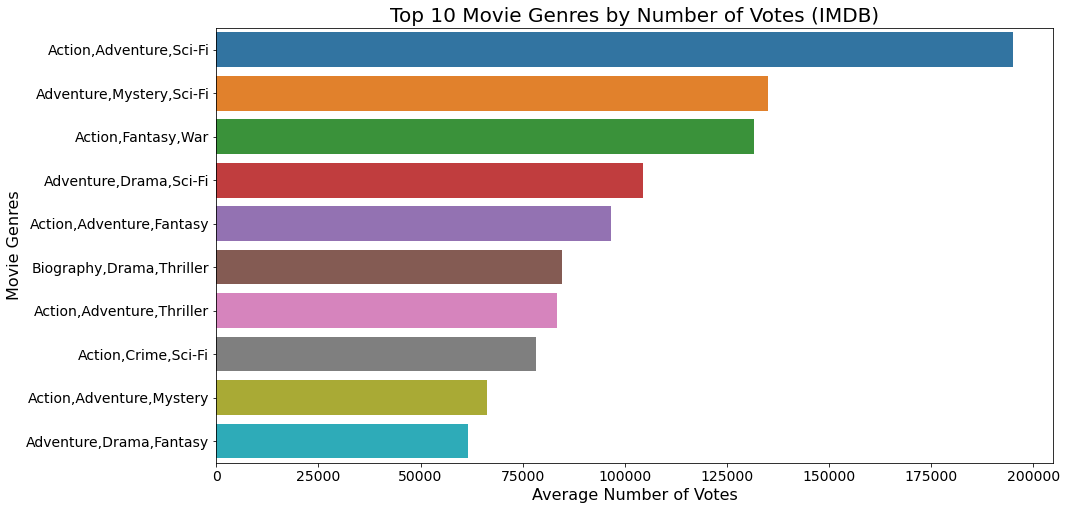

In [88]:
#plotting a bar plot
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'numvotes', y = 'genres', data = imdb2_vote)
plt.xlabel('Average Number of Votes', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Movie Genres', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Top 10 Movie Genres by Number of Votes (IMDB)', fontsize = 20)
plt.show();

#### What movie genres are most common?

In [102]:
imdb_comb_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,6.1,13,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,6.5,119,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [103]:
#separate each movie with multple genres into their own row
imdb_comb_df["genres"] = imdb_comb_df["genres"].str.split(",")
imdb_comb_df_exploded= imdb_comb_df.explode("genres")

In [104]:
#get a count of each time a genre was listed
genre_counts = imdb_comb_df_exploded.groupby('genres').size().reset_index(name='count')

print(genre_counts)

         genres  count
0        Action   6988
1         Adult      3
2     Adventure   3817
3     Animation   1743
4     Biography   3809
5        Comedy  17290
6         Crime   4611
7   Documentary  17753
8         Drama  30788
9        Family   3412
10      Fantasy   2126
11    Game-Show      2
12      History   2825
13       Horror   7674
14        Music   1968
15      Musical    721
16      Mystery   3039
17         News    579
18   Reality-TV     17
19      Romance   6589
20       Sci-Fi   2206
21        Short      1
22        Sport   1179
23     Thriller   8217
24          War    853
25      Western    280


In [105]:
#sort descending order
sorted_genre_counts = genre_counts.sort_values(by='count', ascending=False)
sorted_genre_counts

,genres,count
8,Drama,30788
7,Documentary,17753
5,Comedy,17290
23,Thriller,8217
13,Horror,7674
0,Action,6988
19,Romance,6589
6,Crime,4611
2,Adventure,3817
4,Biography,3809


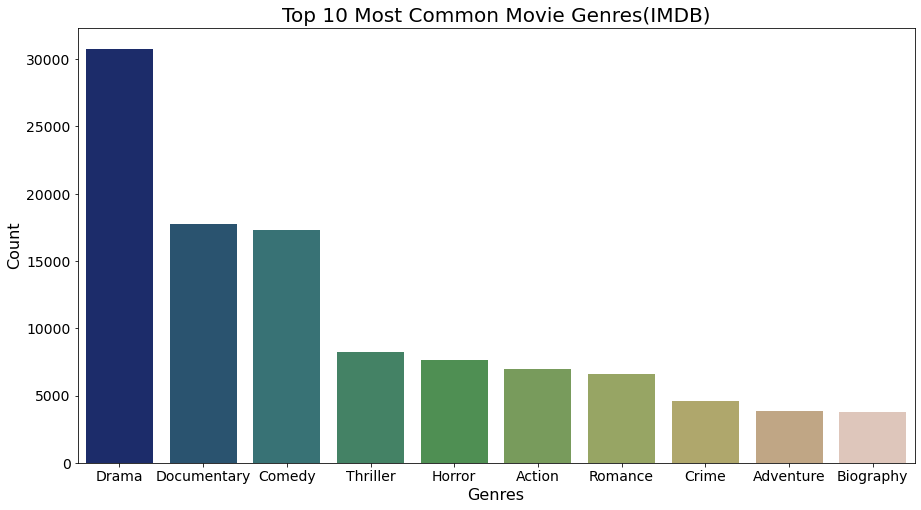

In [111]:
#plotting a bar plot of 10 most common genres
sorted_genre_counts = sorted_genre_counts.head(10)
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'genres', y = 'count', data = sorted_genre_counts, palette='gist_earth')
plt.xlabel('Genres', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Top 10 Most Common Movie Genres(IMDB)', fontsize = 20)
plt.show();

## 2. Does production budget impact a movie's profit?

I will be using The Numbers dataframe to look further into budget vs profit.

In [112]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


{{{{Let's calculate profit and profit margin for each of the movies in imdb_budgets_df dataframe and add those as new columns.

Here, we'll define profit as Worldwide Gross-Production Budget.


It will also be beneficial in our analysis to have uniformity when discussing movie budgets and profits so we will also create an adjusted budget and adjusted profit column to account for inflation.

We will use an average inflation rate of 3.22%.}}}}}

In [161]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [141]:
# adjust $$ for inflation


In [162]:

def clean_currency(x):
  """Removes '$' and ',' from a string and converts it to float."""
  if isinstance(x, str):
    return float(x.replace('$', '').replace(',', ''))
  return x
tn_df['production_budget'] = tn_df['production_budget'].apply(clean_currency)

In [163]:
tn_df['domestic_gross'] = tn_df['domestic_gross'].apply(clean_currency)

In [164]:
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].apply(clean_currency)

In [165]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [167]:
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])

In [169]:
tn_df['year'] = tn_df['release_date'].dt.year

In [166]:

tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

tn_df['profit_margin'] = (tn_df['worldwide_gross'] - 
                                    tn_df['production_budget'])/tn_df['worldwide_gross']


In [170]:
tn_df['adjusted_budget'] = ((((2025-tn_df['year'])*.0322)+1)*
                                      tn_df['production_budget'])

#Suppressing Scienific Notation
pd.options.display.float_format = '{:.2f}'.format

tn_df['adjusted_profit'] = (((2025-tn_df['year'])*.0322)+1)*tn_df['profit']
tn_df.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,year,adjusted_budget,adjusted_profit
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,0.85,2009,643960000.00,3562758366.74
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00,0.61,2011,595698480.00,921350669.85
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,-200237650.00,-1.34,2019,417620000.00,-238923563.98
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00,0.76,2015,437053200.00,1417731259.09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,999721747.00,0.76,2017,398659200.00,1257250069.03


In [174]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   profit             5782 non-null   float64       
 7   profit_margin      5782 non-null   float64       
 8   year               5782 non-null   int64         
 9   adjusted_budget    5782 non-null   float64       
 10  adjusted_profit    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 497.0+ KB


In [175]:
profitable_tn_df = tn_df.loc[tn_df['profit'] > 0]
profitable_ranked_df = profitable_tn_df.sort_values(by=['adjusted_profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True) #Modify the DataFrame in place (do not create a new object).
profitable_ranked_df.head()


,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,year,adjusted_budget,adjusted_profit
0,42,43,1997-12-19,Titanic,200000000.00,659363944.00,2208208395.00,2008208395.00,0.91,1997,380320000.00,3818809083.93
1,0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,0.85,2009,643960000.00,3562758366.74
2,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,1747311220.00,0.85,2015,404532000.00,2309945432.84
3,6,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1748134200.00,0.85,2018,367620000.00,2142163648.68
4,824,25,1993-06-11,Jurassic Park,63000000.00,395708305.00,1038812584.00,975812584.00,0.94,1993,127915200.00,1981289870.55


In [176]:
profitable_ranked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              3657 non-null   int64         
 1   id                 3657 non-null   int64         
 2   release_date       3657 non-null   datetime64[ns]
 3   movie              3657 non-null   object        
 4   production_budget  3657 non-null   float64       
 5   domestic_gross     3657 non-null   float64       
 6   worldwide_gross    3657 non-null   float64       
 7   profit             3657 non-null   float64       
 8   profit_margin      3657 non-null   float64       
 9   year               3657 non-null   int64         
 10  adjusted_budget    3657 non-null   float64       
 11  adjusted_profit    3657 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 343.0+ KB


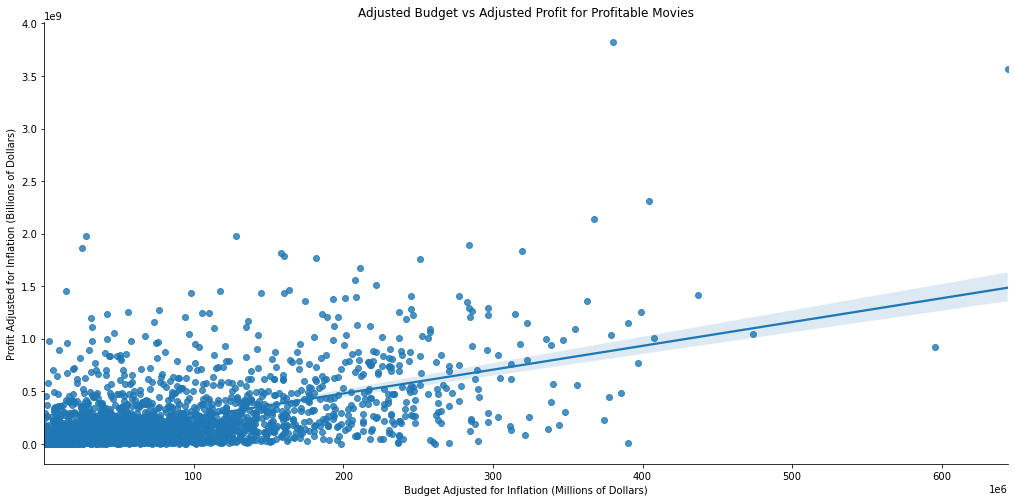

In [177]:

ax1 = sns.lmplot(x='adjusted_budget', y='adjusted_profit', data=profitable_ranked_df, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)')
#setting x-axis label 
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)')
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies')
plt.show();


## Exploratory Data Analysis

# Conclusions

## Limitations

## Recommendations

## Next Steps